In [1]:
import os
import numpy as np
import pandas as pd
pd.set_option('display.float_format',lambda x : '%.5f' % x)
pd.set_option('display.width', 500)    #设置整体宽度
from mtools import plot_fig
import matplotlib.pyplot as plt
import seaborn as sns
from mtools import monkey as mk

os.chdir('/data/wjk/Workspace/Datasets/IGR')
IGR_DIRS = ['IGR_cjy', 'IGR230307', 'IGR230312', 'IGR230415']
IGR_DIR = 'IGR_cjy'

In [5]:
all_imu_data = pd.read_hdf(f'Output/all_imu_data_{IGR_DIR}.h5', 'all_imu')
phones = all_imu_data['phone'].unique()
trips = all_imu_data['trip'].unique()
all_imu_data['AccU'] = all_imu_data['AccU'] - 9.8

In [6]:
all_imu_data.columns

array(['Mate30_2'], dtype=object)

In [17]:
# Normalization
for IGR_DIR in IGR_DIRS:
    all_imu_data = pd.read_hdf(f'Output/all_imu_data_{IGR_DIR}.h5', 'all_imu')
    phones = all_imu_data['phone'].unique()
    trips = all_imu_data['trip'].unique()
    all_imu_data['AccU'] = all_imu_data['AccU'] - 9.8
    acc_values = all_imu_data[['timestamp', 'AccE', 'AccN', 'AccU']].melt(id_vars=['timestamp'], value_vars=['AccE', 'AccN', 'AccU'])['value']
    gyr_values = all_imu_data[['timestamp', 'GysE', 'GysN', 'GysU']].melt(id_vars=['timestamp'], value_vars=['GysE', 'GysN', 'GysU'])['value']
    acc_values = np.abs(acc_values)
    gyr_values = np.abs(gyr_values)
    acc_des = acc_values.astype('float64').describe(percentiles=[.01, 0.1, 0.2, .25, .75, .8, 0.9, 0.99]).to_frame().T
    gyr_des = gyr_values.astype('float64').describe(percentiles=[.01, 0.1, 0.2, .25, .75, .8, 0.9, 0.99]).to_frame().T
    mk.magic_append([acc_des, gyr_des])
acc_des_list, gyr_des_list = mk.magic_get()

In [18]:
acc_des = pd.concat(acc_des_list)
gyr_des = pd.concat(gyr_des_list)
print(acc_des)
print(gyr_des)
print(acc_des/gyr_des)

pd.concat((acc_des, gyr_des, acc_des/gyr_des)).to_csv('Output/acc_gyr_des.csv', float_format='%.2f')

              count    mean     std     min      1%     10%     20%     25%     50%     75%     80%     90%     99%      max
value 2285604.00000 0.68313 0.52671 0.00000 0.01062 0.10613 0.21337 0.26778 0.56428 0.98404 1.10592 1.43979 2.22519  4.86103
value 1768122.00000 1.32696 1.04526 0.00000 0.02038 0.20418 0.40839 0.51173 1.07079 1.90073 2.15465 2.86765 4.38663  9.68904
value 2062416.00000 1.32259 1.13838 0.00000 0.01926 0.19337 0.38581 0.48210 0.99112 1.85422 2.16092 2.99375 4.95650 10.24659
              count    mean     std     min      1%     10%     20%     25%     50%     75%     80%     90%     99%     max
value 2285604.00000 0.15861 0.15137 0.00000 0.00213 0.02145 0.04340 0.05469 0.11838 0.21313 0.24267 0.33954 0.73618 1.85722
value 1768122.00000 0.27039 0.21441 0.00000 0.00431 0.04347 0.08665 0.10838 0.22185 0.37669 0.42368 0.56532 0.95877 1.84387
value 2062416.00000 0.23153 0.18213 0.00000 0.00355 0.03588 0.07225 0.09078 0.19159 0.32954 0.36876 0.47978 0.80734 1.72785
    

In [7]:
trip_id = 2
pre_duration = 0
duration = 20
sub_dfs = [all_imu_data['timestamp'][(all_imu_data['trip']==trips[trip_id])&(all_imu_data['phone']==phone)].to_frame() for phone in phones]
print(len(sub_dfs))
start_timestamps = [sub_df.iloc[0] for sub_df in sub_dfs]
start_timestamp = np.max(start_timestamps) + pre_duration*100
start_timestamp_inds = [np.where(sub_df==start_timestamp)[0][0] for sub_df in sub_dfs]
print(start_timestamp_inds)
sub_dfs = [all_imu_data[(all_imu_data['trip']==trips[trip_id])&(all_imu_data['phone']==phone)].iloc[ind:ind+duration*100] for phone,ind in zip(phones, start_timestamp_inds)]
sub_df = pd.concat(sub_dfs)

1
[0]


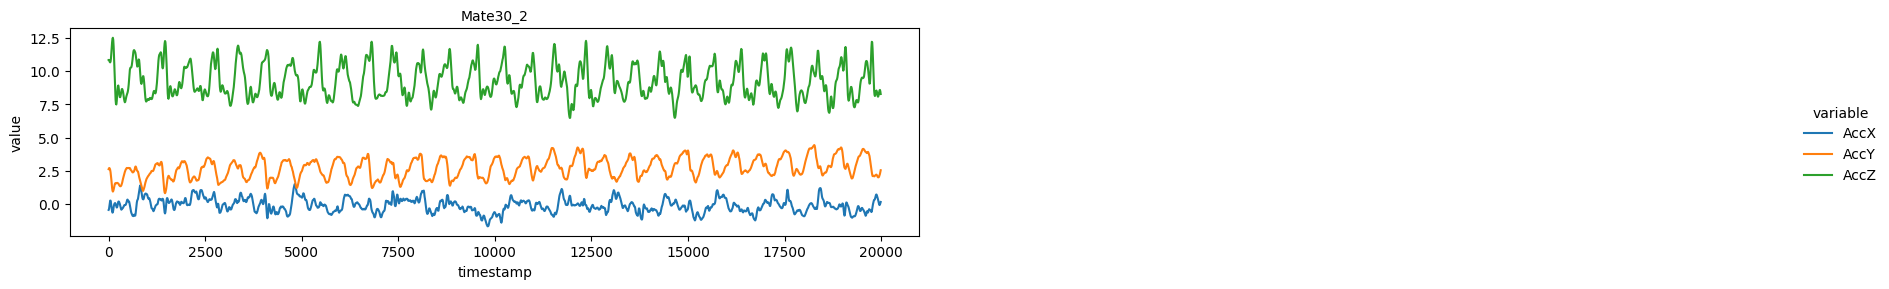

In [8]:
melt_sub_df = pd.melt(sub_df[['timestamp', 'AccX', 'AccY', 'AccZ', "phone"]], id_vars=['timestamp', 'phone'], value_vars=['AccX', 'AccY', 'AccZ'])
melt_sub_df['timestamp'] = melt_sub_df['timestamp']-np.min(melt_sub_df['timestamp'].values)

g = sns.FacetGrid(melt_sub_df, hue='variable', col="phone",  col_wrap=2, despine=False, aspect=3)
g.map(sns.lineplot, "timestamp", "value")
g.set_titles("{col_name}")
g.add_legend()
plt.show()
# g.savefig('Figures/err_scatter_byphone_new.png', dpi=150, pad_inches=0.2)

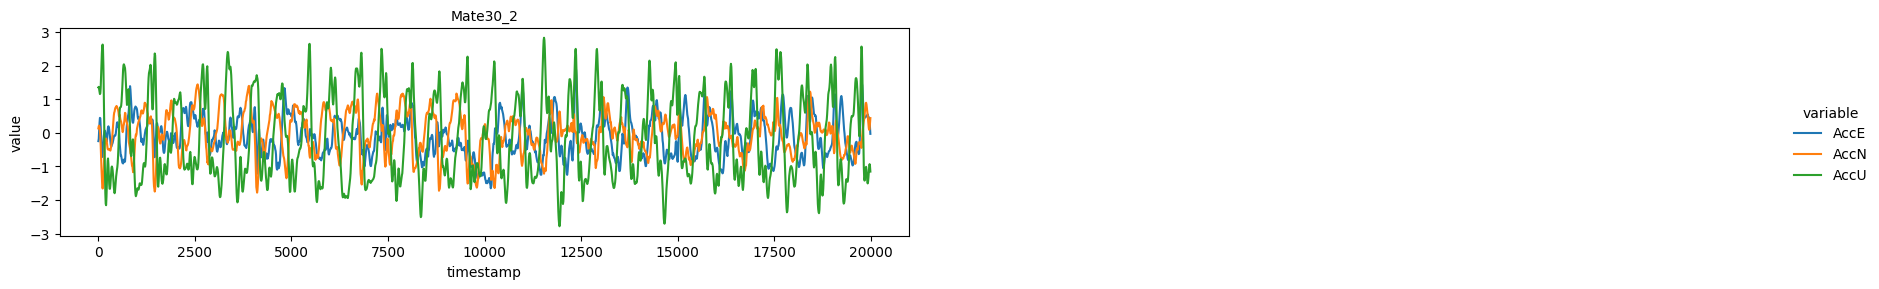

In [9]:
melt_sub_df = pd.melt(sub_df[['timestamp', 'AccE', 'AccN', 'AccU', "phone"]], id_vars=['timestamp', 'phone'], value_vars=['AccE', 'AccN', 'AccU'])
melt_sub_df['timestamp'] = melt_sub_df['timestamp']-np.min(melt_sub_df['timestamp'].values)
g = sns.FacetGrid(melt_sub_df, hue='variable', col="phone",  col_wrap=2, despine=False, aspect=3)
g.map(sns.lineplot, "timestamp", "value")
g.set_titles("{col_name}")
g.add_legend()
plt.show()

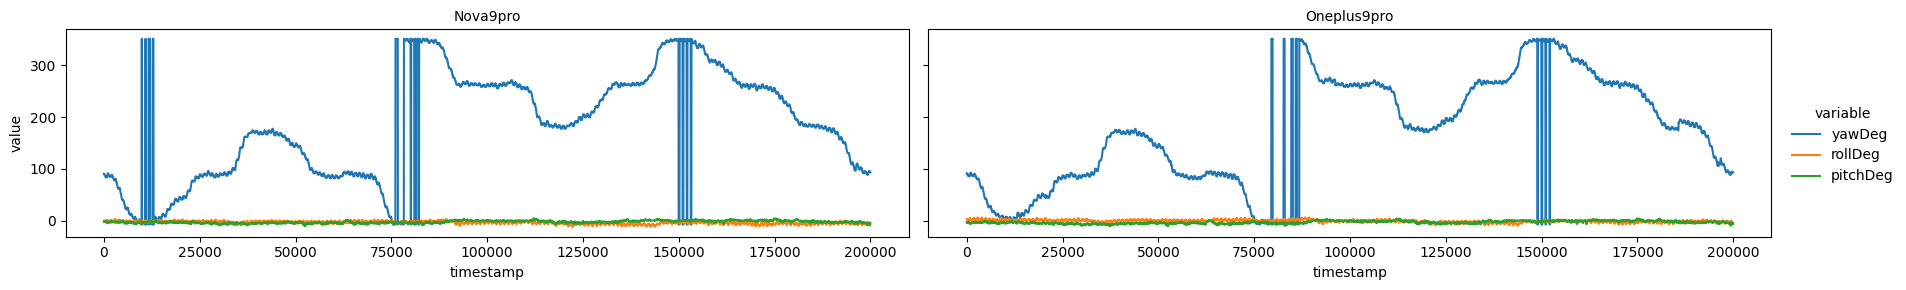

In [5]:
melt_sub_df = pd.melt(sub_df[['timestamp', 'yawDeg', 'rollDeg', 'pitchDeg', "phone"]], id_vars=['timestamp', 'phone'], value_vars=['yawDeg', 'rollDeg', 'pitchDeg'])
melt_sub_df['timestamp'] = melt_sub_df['timestamp']-np.min(melt_sub_df['timestamp'].values)

g = sns.FacetGrid(melt_sub_df, hue='variable', col="phone",  col_wrap=2, despine=False, aspect=3)
g.map(sns.lineplot, "timestamp", "value")
g.set_titles("{col_name}")
g.add_legend()
plt.show()
# g.savefig('Figures/err_scatter_byphone_new.png', dpi=150, pad_inches=0.2)

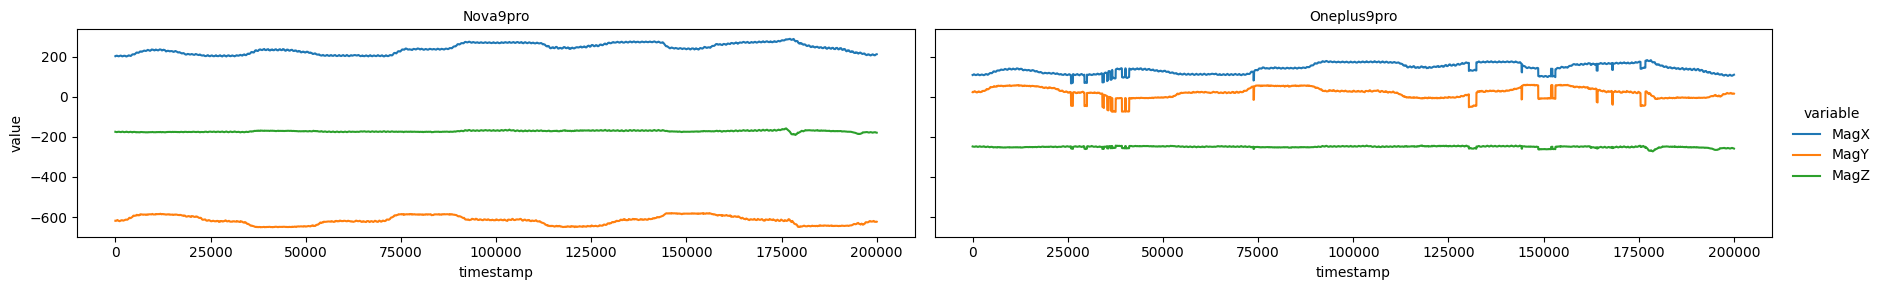

In [7]:
melt_sub_df = pd.melt(sub_df[['timestamp', 'MagX', 'MagY', 'MagZ', "phone"]], id_vars=['timestamp', 'phone'], value_vars=['MagX', 'MagY', 'MagZ'])
melt_sub_df['timestamp'] = melt_sub_df['timestamp']-np.min(melt_sub_df['timestamp'].values)

g = sns.FacetGrid(melt_sub_df, hue='variable', col="phone",  col_wrap=2, despine=False, aspect=3)
g.map(sns.lineplot, "timestamp", "value")
g.set_titles("{col_name}")
g.add_legend()
plt.show()
# g.savefig('Figures/err_scatter_byphone_new.png', dpi=150, pad_inches=0.2)